<a href="https://colab.research.google.com/github/demichie/PhD_ModelingCourse/blob/main/Lecture2/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports globali che useremo frequentemente
import numpy as np
import matplotlib.pyplot as plt

# Impostazioni per i plot (opzionale, ma rende i plot più belli)
plt.style.use('seaborn-v0_8-whitegrid') # o un altro stile che preferisci
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12

# Lecture 2: Principles of Numerical Modelling in Geosciences

## Part 1: Recap and Continuation of Lecture 1

In this first part, we will pick up where we left off in Lecture 1, discussing numerical solutions for ODEs, their implementation, and aspects of accuracy and stability.

Topics covered:
*   Numerical solution of Radioactive Decay (Euler's Method)
*   Explicit vs. Implicit Euler
*   Numerical Accuracy and Stability
*   Summary of Lecture 1 (conceptual)

![Radioactive Decay C14](FIGURES/decay_c14.png)

### Numerical Solution of Radioactive Decay (Explicit Euler)

Recall the ODE for radioactive decay:
$$ \frac{dN}{dt} = -\lambda N(t) $$

Discretizing with the **Explicit Euler method**:
We approximate the derivative as $\frac{dN}{dt} \approx \frac{N^{n+1} - N^n}{\Delta t}$ and evaluate the right-hand side at time $t^n$:
$$ \frac{N^{n+1} - N^n}{\Delta t} = -\lambda N^n $$
Rearranging for $N^{n+1}$:
$$ N^{n+1} = N^n - \lambda \Delta t N^n = N^n (1 - \lambda \Delta t) $$

**Summary of Explicit Euler for Radioactive Decay:**
*   Initial value: $N^0 = N_0$
*   Update formula: $N^{n+1} = N^n (1 - \lambda \Delta t)$
*   Iterate for $n = 0, 1, \dots$

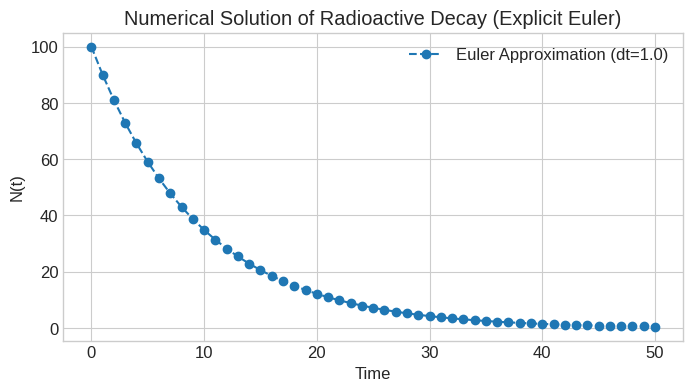

In [3]:
# Python Implementation: Euler's Method for Radioactive Decay

# Parameters
lambda_ = 0.1  # Decay constant
N0 = 100       # Initial quantity
T_max_decay = 50   # Total simulation time
dt_decay = 1.0     # Time step

# Time array
time_decay = np.arange(0, T_max_decay + dt_decay, dt_decay)

# Numerical solution (Euler method)
N_euler = np.zeros_like(time_decay)
N_euler[0] = N0

for n_step in range(len(time_decay) - 1):
    N_euler[n_step + 1] = N_euler[n_step] * (1 - lambda_ * dt_decay)

# Plotting the numerical solution
plt.figure(figsize=(8, 4))
plt.plot(time_decay, N_euler, 'o--', label=f'Euler Approximation (dt={dt_decay})')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.title('Numerical Solution of Radioactive Decay (Explicit Euler)')
plt.grid(True)
plt.legend()
plt.show()


### Exercise: Try a Larger Time Step (Explicit Euler)

What happens if we increase the time step $\Delta t$? Let's try $\Delta t = 15.0$.
The stability condition for explicit Euler for this problem is $\Delta t \le \frac{1}{\lambda}$.
If $\lambda = 0.1$, then $\Delta t$ must be $\le 10$. A $\Delta t = 15.0$ should show instability.

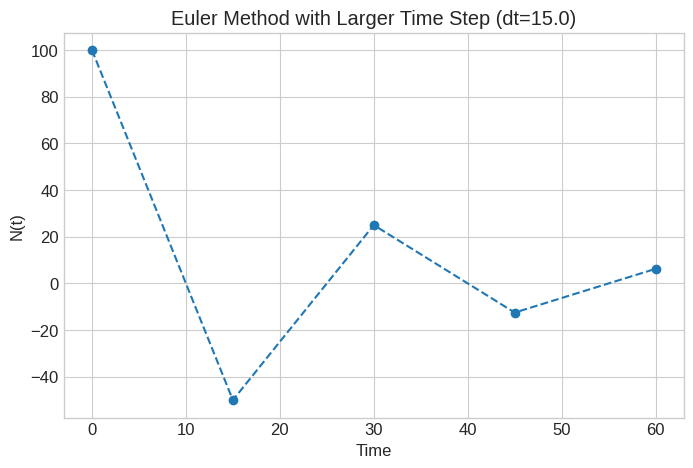

In [4]:
# Parameters (lambda_ and N0 from previous cell)
# T_max_decay from previous cell

dt_large_decay = 15.0  # New, larger time step
time_large_dt_decay = np.arange(0, T_max_decay + dt_large_decay, dt_large_decay)

N_euler_large_dt = np.zeros_like(time_large_dt_decay)
N_euler_large_dt[0] = N0

for n_step in range(len(time_large_dt_decay) - 1):
    N_euler_large_dt[n_step + 1] = N_euler_large_dt[n_step] * (1 - lambda_ * dt_large_decay)

# Plotting
plt.plot(time_large_dt_decay, N_euler_large_dt, 'o--')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.title(f'Euler Method with Larger Time Step (dt={dt_large_decay})')
plt.grid(True)
plt.show()
# Corresponds to FIGURES/image4.png

### Numerical Instability
Observations:
*   With $\Delta t=1.0$, the solution was qualitatively correct.
*   With $\Delta t=15.0$ (given $\lambda=0.1$), we observe unphysical oscillations and negative values because $1 - \lambda \Delta t = 1 - 0.1 \cdot 15 = 1 - 1.5 = -0.5 < 0$.
*   The update rule becomes unstable if $1 - \lambda \Delta t < 0 \Rightarrow \Delta t > \frac{1}{\lambda}$.

This highlights the **conditional stability** of the explicit Euler method.

### Interpreting the Explicit Euler Scheme
The explicit Euler method assumes the decay rate is constant over the time step $\Delta t$, equal to its value at the *beginning* of the interval $[t^n, t^{n+1}]$.
$$ N^{n+1} = N^n - (\lambda N^n) \Delta t $$

### An Alternative Assumption: Implicit (Backward) Euler
What if we assume the rate is constant over $[t^n, t^{n+1}]$, but equal to its value at the *end* of the interval?
$$ N^{n+1} = N^n - (\lambda N^{n+1}) \Delta t $$
This is the **Backward (Implicit) Euler Method**. Rearranging for $N^{n+1}$:
$$ N^{n+1} (1 + \lambda \Delta t) = N^n \Rightarrow N^{n+1} = \frac{N^n}{1 + \lambda \Delta t} $$
This scheme is *unconditionally stable* for this problem.

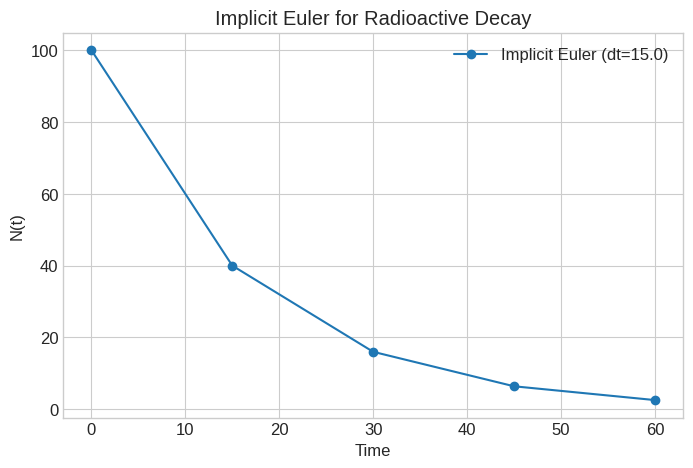

In [5]:
# Python Implementation: Implicit Euler for Radioactive Decay

lambda_val_implicit = 0.1  # Decay constant (can be same as lambda_)
dt_implicit_decay = 15.0      # Time step (can be large)
T_implicit_decay = 60       # Total time
N0_implicit = 100           # Initial quantity

times_implicit = np.arange(0, T_implicit_decay + dt_implicit_decay, dt_implicit_decay)

N_implicit = np.zeros_like(times_implicit)
N_implicit[0] = N0_implicit

for n_step in range(len(times_implicit) - 1):
    N_implicit[n_step + 1] = N_implicit[n_step] / (1 + lambda_val_implicit * dt_implicit_decay)

plt.plot(times_implicit, N_implicit, 'o-', label=f'Implicit Euler (dt={dt_implicit_decay})')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.title('Implicit Euler for Radioactive Decay')
plt.legend()
plt.grid(True)
plt.show()
# Corresponds to FIGURES/image5.png

### Exercises (from Lecture 1, for students to try)

1.  **Time Step Sensitivity (Implicit Euler):**
    *   Use the implicit Euler method for decay with $\Delta t = 5.0$ and $\Delta t = 20.0$ (use $\lambda=0.1, N_0=100, T_{max}=60$).
    *   Plot the solutions and comment on their behavior and stability.

2.  **Explicit vs Implicit Euler:**
    *   Solve the decay equation using both methods for various $\Delta t$ (e.g., $\Delta t = 1, 5, 15, 20$ with $\lambda=0.1$). Compare accuracy against the analytical solution $N(t) = N_0 e^{-\lambda t}$, and stability.

3.  **Apply to Newton’s Law of Cooling:**
    *   The ODE is $\frac{dT}{dt} = -k(T - T_{\text{env}})$.
    *   Derive the explicit and implicit Euler schemes.
    *   Implement them and compare results for chosen parameters (e.g., $k=0.05, T_0=100, T_{\text{env}}=20, \Delta t=10, T_{max}=200$).

## Numerical Accuracy and Stability

### Analytical vs. Numerical (Explicit Euler)
Let's compare the numerical solution from Explicit Euler with the exact analytical solution $N(t) = N_0 e^{-\lambda t}$.

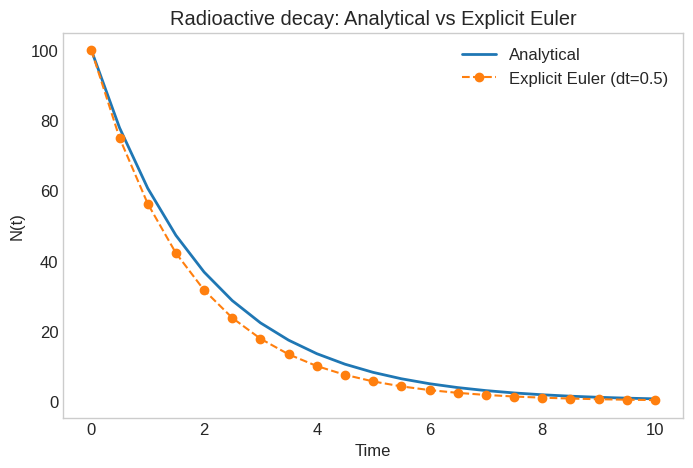

In [6]:
# Parameters for accuracy comparison
lambda_acc = 0.5
N0_acc = 100
t_max_acc = 10
dt_acc = 0.5  # Try changing this: 0.1, 1.0, 1.9 (stable), 2.1 (unstable for lambda=0.5)

t_values_acc = np.arange(0, t_max_acc + dt_acc, dt_acc)

# Analytical solution
N_analytical_acc = N0_acc * np.exp(-lambda_acc * t_values_acc)

# Explicit Euler method
N_explicit_acc = np.zeros_like(t_values_acc) # Use np.zeros_like for consistency
N_explicit_acc[0] = N0_acc
for n_step in range(len(t_values_acc) - 1): # Corrected loop to use n_step+1 for assignment
    N_explicit_acc[n_step + 1] = N_explicit_acc[n_step] - lambda_acc * N_explicit_acc[n_step] * dt_acc

# Plotting
plt.plot(t_values_acc, N_analytical_acc, label='Analytical', lw=2)
plt.plot(t_values_acc, N_explicit_acc, 'o--', label=f'Explicit Euler (dt={dt_acc})')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.legend()
plt.grid()
plt.title('Radioactive decay: Analytical vs Explicit Euler')
plt.show()
# Corresponds to FIGURES/image6.png

### Definition of Error
We compare the numerical solution $N_n^{(\text{num})}$ with the exact (analytical) solution $N(t_n)$.

**Pointwise (absolute) error at time $t_n$**:
$$ \varepsilon_n = |N_n^{(\text{num})} - N(t_n)| $$
(Often the non-absolute difference $N_n^{(\text{num})} - N(t_n)$ is also called error, but absolute error is common for plotting magnitudes).

The error generally depends on:
*   the time step size $\Delta t$
*   the numerical method used
*   the regularity (smoothness) of the true solution

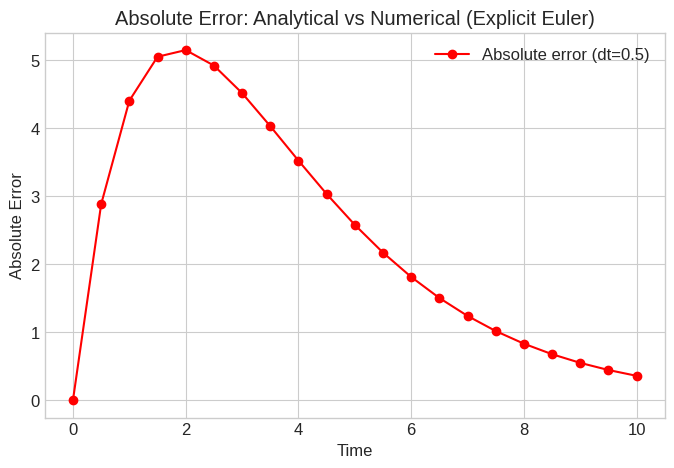

In [7]:
# Plotting the Absolute Error

# Parameters (use from previous cell: lambda_acc, N0_acc, t_max_acc)
# dt_error_plot = 1.0  # Can choose a different dt for this specific plot
dt_error_plot = dt_acc # Or use the same dt as the accuracy plot above
t_error = np.arange(0, t_max_acc + dt_error_plot, dt_error_plot)

# Analytical solution
N_exact_error = N0_acc * np.exp(-lambda_acc * t_error)

# Explicit Euler method
N_num_error = np.zeros_like(t_error)
N_num_error[0] = N0_acc
for n_step in range(1, len(t_error)):
    N_num_error[n_step] = N_num_error[n_step-1] - lambda_acc * N_num_error[n_step-1] * dt_error_plot

# Compute absolute error
error_abs = np.abs(N_exact_error - N_num_error)

# Plot
plt.plot(t_error, error_abs, 'r-o', label=f'Absolute error (dt={dt_error_plot})')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.title('Absolute Error: Analytical vs Numerical (Explicit Euler)')
plt.legend()
plt.grid(True)
plt.show()
# Corresponds to FIGURES/image7.png

### Relative Error
The **relative error** is:
$$ \epsilon_{\text{rel}}(t) = \frac{|N_{\text{exact}}(t) - N_{\text{num}}(t)|}{|N_{\text{exact}}(t)|} \quad (\text{for } N_{\text{exact}}(t) \neq 0) $$
Relative error is more informative when:
*   The quantity of interest becomes very small.
*   We want to assess the error proportionally to the expected value.

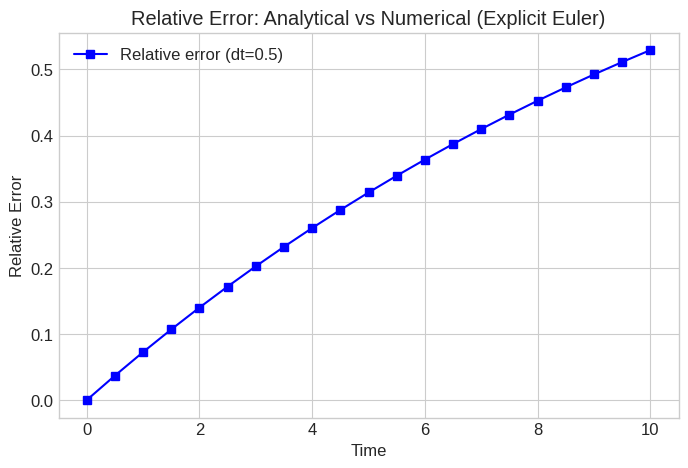

In [8]:
# Plotting the Relative Error
# (Using N_exact_error and N_num_error from the previous cell)

# Compute relative error, avoiding division by zero
# N_exact_error is exponential, so > 0 for finite t.
# Add a small epsilon for safety if N_exact_error can be zero.
epsilon_div = 1e-15
rel_error = np.abs(N_exact_error - N_num_error) / (np.abs(N_exact_error) + epsilon_div)
# A more robust way for general cases:
# rel_error = np.zeros_like(N_exact_error)
# non_zero_mask = np.abs(N_exact_error) > epsilon_div
# rel_error[non_zero_mask] = np.abs(N_exact_error[non_zero_mask] - N_num_error[non_zero_mask]) / np.abs(N_exact_error[non_zero_mask])


# Plot
plt.plot(t_error, rel_error, 'b-s', label=f'Relative error (dt={dt_error_plot})')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.title('Relative Error: Analytical vs Numerical (Explicit Euler)')
plt.legend()
plt.grid(True)
plt.show()
# Corresponds to FIGURES/image8.png

### Numerical Accuracy
Accuracy refers to how close the numerical solution is to the exact (analytical) solution.
*   With explicit Euler, reducing $\Delta t$ generally improves accuracy (up to a point where round-off errors might dominate).
*   Accuracy is influenced by the method’s **order**: Euler’s method is *first-order accurate*.

### Numerical Stability
A numerical method is **stable** if errors do not grow uncontrollably.
*   Explicit Euler for decay is conditionally stable ($\Delta t \le 1/\lambda$).
*   Instability can make the numerical solution completely unreliable.



## Part 2: Implicit vs Explicit for Nonlinear ODEs

### Recap from Lecture 1
*   **Explicit (Euler):** Future value depends only on known quantities. Simple, conditionally stable.
*   **Implicit (Backward Euler):** Future value appears on both sides. More robust, can be unconditionally stable. For linear ODEs, implementation was straightforward.

**A Natural Question:** Should we always use implicit schemes because they are more stable?
Let's look at a **nonlinear ODE** where implementing an implicit scheme requires more effort.

*(Comparison of explicit unstable vs implicit stable from decay example)*
![Explicit Unstable](FIGURES/image4.png)
![Implicit Stable](FIGURES/image5.png)

### Water Infiltration into Soil
A common process in Earth sciences is rainwater infiltration into unsaturated soil.
*   Described by **Richards’ equation** (nonlinear PDE).
*   We consider a simplified, lumped, time-dependent version.
*   Model volumetric water content $\theta(t)$ decreasing due to percolation.

*Reference: Hillel, D. (1998). Environmental Soil Physics. Academic Press.*

![Soil Diagram](FIGURES/soil.png)

*Water content $\theta$ is a ratio, from 0 (dry) to porosity (saturated).*